# TMA4320 Introduksjon til vitenskapelige beregninger
### av Mikael Bourmistrov & Ivar Sandvik

In [2]:
import numpy as np
import matplotlib.pyplot as plt

<h1> Task 1 </h1>

Example of how to define a matrix as an array and calculate its SVD. We pass the `full_matrices = False` argument so that it does not calculate
more entries than necessary.

### a)

In [3]:
# Create matrix
A1 = np.array([[1000, 1], [0, 1], [0, 0]])

# Calculate SVD
U1,S1,Vt1 = np.linalg.svd(A1, full_matrices = False)

# Print shapes 
print("Shape of U: ", U1.shape) # Expect (3,2)
print("Shape of S: ", S1.shape) # Expect (2,)
print("Shape of Vt: ", Vt1.shape) # Expect (2,2)

Shape of U:  (3, 2)
Shape of S:  (2,)
Shape of Vt:  (2, 2)


In [4]:
np.set_printoptions(precision=3, suppress=True)     # Bare for å printe matrisene litt mer leselig.

print("U=")
print(U1)
print("S=")
print(np.diag(S1))
print("Vt=")
print(Vt1)

U=
[[ 1. -0.]
 [ 0.  1.]
 [ 0.  0.]]
S=
[[1000.001    0.   ]
 [   0.       1.   ]]
Vt=
[[ 1.     0.001]
 [-0.001  1.   ]]


Her er $\Sigma$ returnert som en vektor slik den første kodeblokken viser. Dette er som følge av hvordan numpyfunksjonen linalg.svd() fungerer. Selv om $\Sigma$ er en diagonal matrise lønner det seg å lagre den som en 1D-array i koden, da dette tar mindre plass i minnet. Når vi bruker den senere puttes den inn i funkjsonen np.diag(S), og tolker vektoren S som diagonalen til en matrise, og returnerer den som 2D-array.

In [5]:
A1_reconstructed = U1.dot(np.diag(S1)).dot(Vt1)

print("A1 reconstructed=")
print(A1_reconstructed)

A1 reconstructed=
[[1000.    1.]
 [  -0.    1.]
 [   0.    0.]]


I faktoriseringen skal $U$ representere basisvektorene til $A_1$. Hvilke av basisvektorene $W_1 = U$ som er viktigst for å rekonstruere $A_1$ er da bestemt av $\Sigma$ som skal fremstille den relative vekten til hver av disse basisvektorene. Med andre ord er basisvektoren tilhørende størst verdi i $\Sigma$ den som vil veie mest i rekonstruksjonen av $A_1$. Alternativt kan man se på kolonnene i $U$ og undersøke hvilken av de som har størst norm, da dette korresponderer med retning med størst variasjon i data. I dette eksempelet er det dermed den første kolonnen $U$ som veier mest i rekonstruksjonen da første elementet i $\Sigma$ er det største.

### b)

In [6]:
def truncSVD(U, S, Vt, d):
    W = U[:, :d]   # keep first d columns of U
    Hd = np.diag(S[:d]).dot(Vt[:d, :])   # keep first d rows of Vt, multiply by truncated singular values
    return W, Hd

Over er funksjonen som skal brukes senere også, kort og konsist og generelt. Under følger de spesifikke detaljene det blir spurt om i oppgave 1 b).

In [7]:
A2 = np.array([[1, 0, 0], [1, 0, 0], [0, 0, 1]])
U2, S2, Vt2 = np.linalg.svd(A2)

# Printer SVD-matrisene
print("U:\n", U2)
print("S:\n", S2)
print("Vt:\n", Vt2)

# En kode som sjekker om basisvektorene inneholder relevant informasjon
tol = 1e-10   # toleranse for null singulærverdier ////// Burde tol være mindre? Større, husk å diskuter.
num_zero = sum(np.abs(S2) < tol)   # tell antall singulærverdier som er nær null
print("Number of zero singular values:", num_zero)
if num_zero > 0:
    print("Den/de siste", num_zero, "kolonnen/e i U inneholder ikke relevant informasjon om A2")

# Bruker truncSVD for å få redusert SVD med d=2:
d = 2
W2, Hd = truncSVD(U2, S2, Vt2, d)
print("W2:\n", W2)
print("Hd:\n", Hd)

# Bekrefter at A2 = UdΣdVt:
A2_reconstructed = W2.dot(Hd)
print("A2 reconstructed:")
print(A2_reconstructed)

U:
 [[-0.707  0.    -0.707]
 [-0.707  0.     0.707]
 [ 0.     1.     0.   ]]
S:
 [1.414 1.    0.   ]
Vt:
 [[-1. -0. -0.]
 [ 0.  0.  1.]
 [ 0.  1.  0.]]
Number of zero singular values: 1
Den/de siste 1 kolonnen/e i U inneholder ikke relevant informasjon om A2
W2:
 [[-0.707  0.   ]
 [-0.707  0.   ]
 [ 0.     1.   ]]
Hd:
 [[-1.414  0.     0.   ]
 [ 0.     0.     1.   ]]
A2 reconstructed:
[[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]


SVD-faktorisering kan returnere basisvektorer som ikke inneholder relevant informasjon for å representere matrisen $A$ de ble faktorisert ut fra. En måte å finne ut av dette er ved å bruke en svært liten toleranse for å identifisere de singularverdiene som er nær null. Deretter kan man telle antallet singularverdier som er nær null. Hvis det finnes singularverdier som er nær null, betyr det at noen av basisvektorene i $U$ ikke er relevante for å rekonstruere matrisen $A$.

Hvis noen av basisvektorene i U ikke er relevante for å rekonstruere matrisen $A_2$, betyr det at kolonnene i $A_2$ kan projiseres ned i et mindre antall dimensjoner uten at mye informasjon går tapt. Vi kan da bruke en redusert SVD for å få en mindre dimensjonal rekonstruksjon av matrisen $A_2$.

For å bekrefte at det er trygt å bruke en redusert SVD for å rekonstruere $A_2$, kan vi bruke $W_2$ og $H_d$ fra funksjonen truncSVD() til å rekonstruere $A_2$ ved å multiplisere $W_2$ med $H_d$. Hvis dette gir oss $A_2$ med høy nøyaktighet, kan vi trygt bruke en redusert SVD.

### c)

In [8]:
def orthproj(dictionary, matrix):
    return dictionary@(dictionary.T @ matrix)

In [9]:
# B-matrise av tre b-kolonnevektorer
B = np.array([[2, 0, 0], [1, 0, 1], [0, 1, 0]])

print("Oppgave a). \n Projection of B onto U: \n ", orthproj(U1, B))
print("Oppgave b). \n Projection of B onto W2: \n ", orthproj(W2, B))

Oppgave a). 
 Projection of B onto U: 
  [[2. 0. 0.]
 [1. 0. 1.]
 [0. 0. 0.]]
Oppgave b). 
 Projection of B onto W2: 
  [[1.5 0.  0.5]
 [1.5 0.  0.5]
 [0.  1.  0. ]]


In [10]:
def columnwise_distances(matrix, dictionary):
    projection = orthproj(dictionary, matrix)
    return np.linalg.norm(matrix - projection, axis=0, ord = 2)

In [11]:
# Columnwise distances to dictionary W1
W1, Hd = truncSVD(U1, S1, Vt1, d)
D_A1 = columnwise_distances(B, W1)
print("Columnwise distances from B to U1:\n", D_A1)

# Columnwise distances to dictionary W2
D_A2 = columnwise_distances(B, W2)
print("Columnwise distances from B to U2:\n", D_A2)

Columnwise distances from B to U1:
 [0. 1. 0.]
Columnwise distances from B to U2:
 [0.707 0.    0.707]


### d)

In [12]:
def nnproj(dictionary, matrix, maxiter, delta):
    
    # litt mellomregning for å avlaste for-loopen
    X = dictionary.T @ matrix
    Y = dictionary.T @ dictionary

    # initialize H+ using np.random.uniform
    H_plus = np.random.uniform(0, 1, np.shape(X))

    # Iterate until convergence or maximum number of iterations is reached
    for i in range(maxiter):
        H_plus = H_plus * X/(Y @ H_plus + delta)        
    
    return H_plus

In [13]:
def nn_distances(projection, data):
    projections = nnproj(projection, data, 50, 1e-10)
    return np.linalg.norm(data - np.dot(projection, projections), axis=0, ord=2)

In [14]:
# Kaller funkskjonene over for å hente testverdierr,
H1 = nnproj(A1, B, 50, 1e-10)
H2 = nnproj(A2, B, 50, 1e-10)

P_A1 = A1 @ H1
P_A2 = A2 @ H2

D1 = nn_distances(P_A1, B)
D2 = nn_distances(P_A2, B)

# Et print for å teste funksjonene over,
print('P+_A1(B) = \n', P_A1)
print()
print('P+_A2(B) = \n', P_A2)
print()
print('D+(A1) = \n', D1)
print()
print('D+(A2) = \n', D2)


P+_A1(B) = 
 [[2.001 0.    0.5  ]
 [0.999 0.    0.5  ]
 [0.    0.    0.   ]]

P+_A2(B) = 
 [[1.5 0.  0.5]
 [1.5 0.  0.5]
 [0.  1.  0. ]]

D+(A1) = 
 [0.044 1.    0.707]

D+(A2) = 
 [0.707 0.    0.707]


<h1> Task 2 </h1>

We first load the data. Note that the files `train.npy` and `test.npy` should be in the same folder as this notebook.

The data is stored as `(number of pixels, number of classes, number of datapoints)`.
We have a total of $5000$ training data points for each class, and $800$ test datapoints for each class.


### a)

In [15]:
# Load the data and resclae
train = np.load('train.npy')/255.0
test = np.load('test.npy')/255.0

# Shapes are (number of pixels, number of classes, number of data)
print(train.shape) # Should be (784,10,5000)
print(test.shape) # Should be (784,10,800)


(784, 10, 5000)
(784, 10, 800)


Below is code that plot images on a grid. Feel free to use this or create a better one yourself.

In [16]:
def plotimgs(imgs, nplot = 4):
    """
    Plots the nplot*nplot first images in imgs on an nplot x nplot grid. 
    Assumes heigth = width, and that the images are stored columnwise
    input:
        imgs: (height*width,N) array containing images, where N > nplot**2
        nplot: integer, nplot**2 images will be plotted
    """

    n = imgs.shape[1]
    m = int(np.sqrt(imgs.shape[0]))

    # assert(n > nplot**2), "Need amount of data in matrix N > nplot**2  # Dette viste seg å ikke ha noe relevanse (kanske >=?)

    # Initialize subplots
    fig, axes = plt.subplots(nplot,nplot)

    # Set background color
    plt.gcf().set_facecolor("lightgray")

    # Iterate over images
    for idx in range(nplot**2):

        # Break if we go out of bounds of the array
        if idx >= n:
            break

        # Indices
        i = idx//nplot; j = idx%nplot

        # Remove axis
        axes[i,j].axis('off')

        axes[i,j].imshow(imgs[:,idx].reshape((m,m)), cmap = "gray")
    
    # Plot

    fig.tight_layout()
    plt.show()


We now plot the first 16 images of the $0$ class, which is accessed as `train[:,0,:]`. We can also acess for example the 2nd image of class $0$ as `train[:,0,1]`.

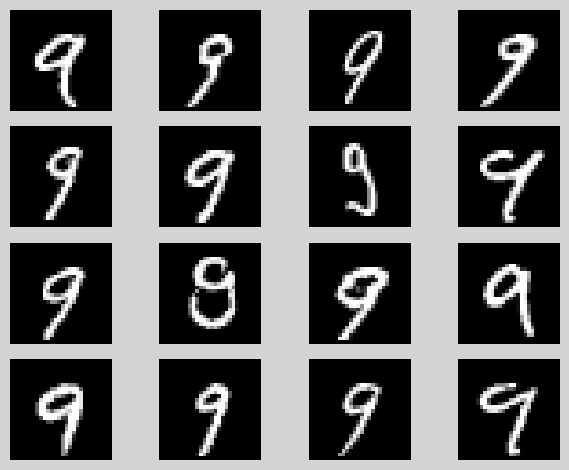

In [17]:
# Plot first 16 images of the zero integer
plotimgs(train[:,9,:], nplot = 4)

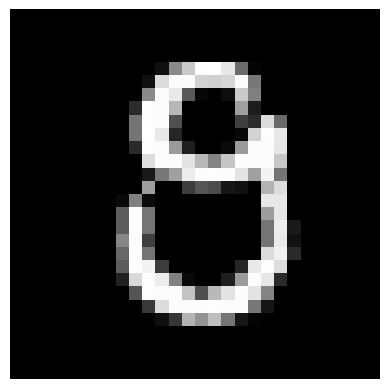

In [18]:
################### Den ene datasettet for det ene integere ###################

# Plot the second image of the 2 digit
# Note that we have to reshape it to be 28 times 28!
plt.imshow(train[:, 9, 9].reshape((28,28)), cmap = 'gray')
plt.axis('off')
plt.show()

### b)

The below code extracts $n = 1000$ datapoints from the training data of a chosen class and stores it in a $(m,n)$ array called `A` that we can for example apply the SVD to.

In [19]:
n = 1000 # Number of datapoints
c = 9 # Class / integer

A = train[:,c,:n]

print(A.shape) # Expect (784,n)

(784, 1000)


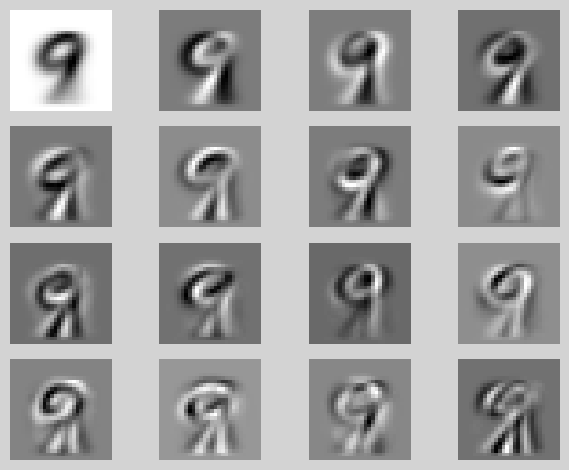

In [20]:
d = 16 # Hvor mange colonner av U skal plottes

U_b, S_b, Vt_b = np.linalg.svd(A, full_matrices = False)

plotimgs(U_b[:,:d], nplot = 4) # U_b[:,:d] er det samme som U_d eller W.

These basis vectors should seem to capture the important features of the digit '9', such as the vertical stroke and the loop. The first singular vector should seem to capture the overall shape of the digit, while the subsequent vectors capture more detailed features.

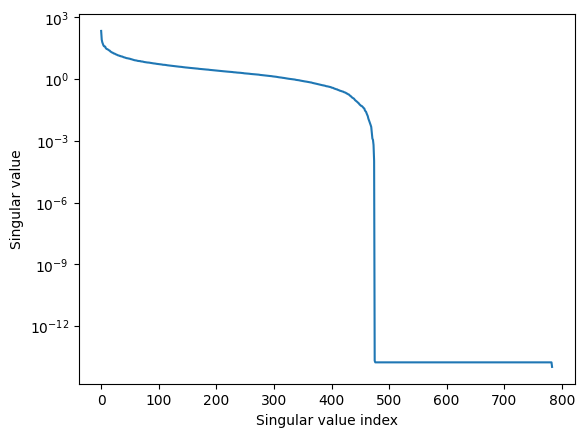

In [21]:
plt.semilogy(S_b)
plt.xlabel('Singular value index')
plt.ylabel('Singular value')
plt.show()

The plot should show that the first few singular values are much larger than the rest, indicating that the data can be well approximated by a low-rank matrix. The singular values decrease rapidly, suggesting that the higher-order singular vectors capture less and less information about the data. (important to say after the fall that the datapoints on the bottom are probabkly zero?)

### c)

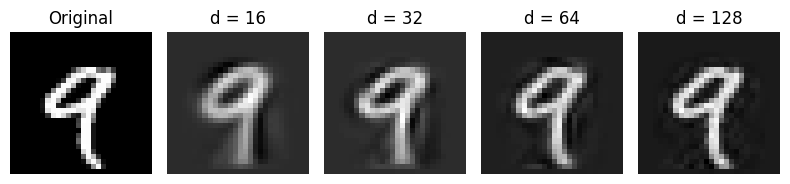

In [22]:
b = A[:,0] 
d_vector = [16, 32, 64, 128]

fig_c, axes_c = plt.subplots(ncols = len(d_vector)+1, figsize=(8,5))

axes_c[0].imshow(b.reshape(28, 28), cmap='gray')
axes_c[0].set_title('Original')
axes_c[0].axis('off')

for i, d in enumerate(d_vector): # går over verdiene av d
    P_W_c = orthproj(U_b[:,:d], b) #projecksjonen av b på W som er en dictionary trent på 9 (W er det samme som U_b[:,:d] / U_d). har allerede kalkulert SVD til A (U-delen) så trenger ikke gjøre det igjenn.
    
    axes_c[i+1].imshow(P_W_c.reshape(28, 28), cmap='gray')
    axes_c[i+1].set_title(f"d = {d}")
    axes_c[i+1].axis('off')

fig_c.tight_layout()


Mere detaljer for større d, men også "noise pollution". Generell form er lik på alle.

(CHATGPT: As d increases, the projected images become smoother and lose some of the finer details of the original image. This is because higher-order singular vectors capture more and more noise in the data, which can lead to overfitting. However, the overall shape of the digit is still preserved even for large values of d.)

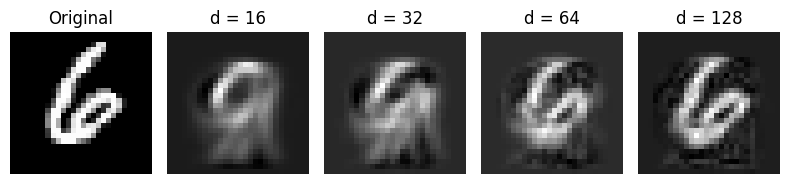

In [23]:
A_other = train[: ,6 , :n] # Finner ny b, n = 1000 fortsatt
b_other = A_other[:, 0]

fig_other, axes_other = plt.subplots(ncols = len(d_vector)+1, figsize=(8,5))

axes_other[0].imshow(b_other.reshape(28, 28), cmap='gray')
axes_other[0].set_title('Original')
axes_other[0].axis('off')

for i, d in enumerate(d_vector):
    P_W_other = orthproj(U_b[:,:d], b_other) #projeksjonen av b_other på DEN SAMME W som i kodeblokken over.
    
    axes_other[i+1].imshow(P_W_other.reshape(28, 28), cmap='gray')
    axes_other[i+1].set_title(f"d = {d}")
    axes_other[i+1].axis('off')

fig_other.tight_layout()

Blir bedre for større d, men ellers gankse dårlig, "ghost image" av 9, siden trent på 9. (CHATGPT: When using a different image new_b, you should observe that the projected images are very different from the original image, even for small values of d. This is because the subspace spanned by the left singular vectors of A is specific to the digit '9', and projecting an image of a different digit onto this subspace will not preserve the original image well. As d increases, the projected images become even more distorted and less recognizable. This shows that the subspace spanned by the left singular vectors of A is not a good representation for images of a different digit)

### d)

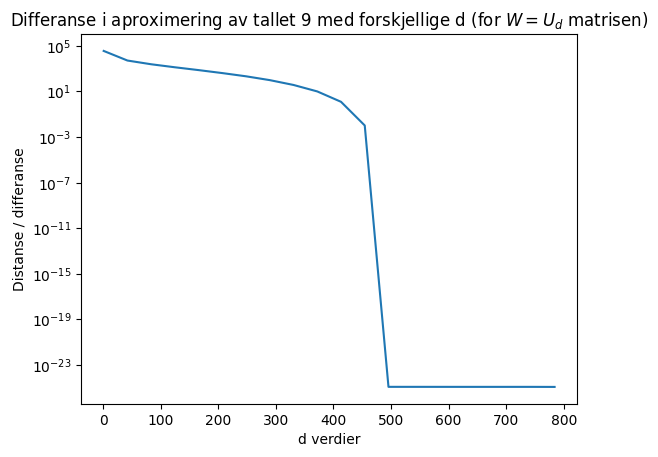

In [115]:
def frebenius_norm_error(matrix, dictionary):   #lag func? siden det skal brukes på f også.
    projection = orthproj(dictionary, matrix)
    return np.linalg.norm(matrix - projection, ord = "fro")**2 # "fro" her står for frebenius.

d_vector_big_steps = np.linspace(1, 784, 20)
frebenius_norm_error_vector = np.zeros(len(d_vector_big_steps))

for i, d in enumerate(d_vector_big_steps):
    frebenius_norm_error_vector[i] = frebenius_norm_error(A, U_b[:, :int(d)]) # fortsatt samme dictionary som på b (altså den trent for 9), og A er også 9-ere.

plt.semilogy(d_vector_big_steps, frebenius_norm_error_vector)
plt.xlabel('d verdier')
plt.ylabel('Distanse / differanse')
plt.title("Differanse i aproximering av tallet 9 med forskjellige d (for $W = U_d$ matrisen)")
plt.show()

Vi gjør det samme for ett "feil" tall, et som ikke er trent i dictionarien. 

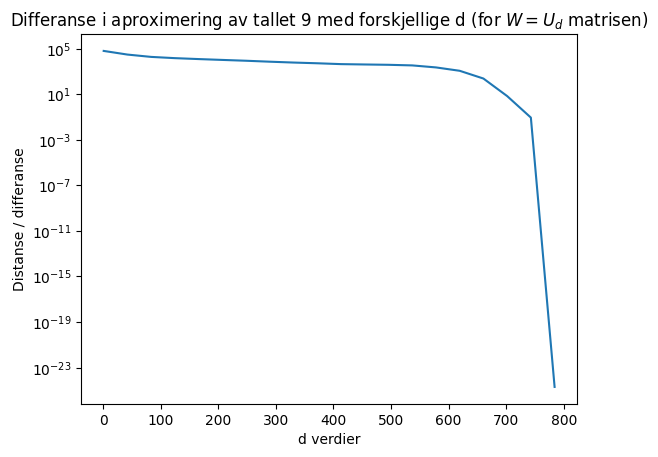

In [116]:
frebenius_norm_error_vector = np.zeros(len(d_vector_big_steps))

for i, d in enumerate(d_vector_big_steps):
    frebenius_norm_error_vector[i] = frebenius_norm_error(A_other, U_b[:, :int(d)]) # A_other er datasettet for tallet 6

plt.semilogy(d_vector_big_steps, frebenius_norm_error_vector)
plt.xlabel('d verdier')
plt.ylabel('Distanse / differanse')
plt.title("Differanse i aproximering av tallet 9 med forskjellige d (for $W = U_d$ matrisen)")
plt.show()

Comparing the plots for the digit that W was trained on and the test digit, you should observe that the error in approximating the digit that W was trained on decreases rapidly with increasing d, but eventually levels off. The error for the test digit, on the other hand, decreases much more slowly and doesn't level off even for large values of d. That should suggest that the basis vectors that W learned are specific to the digit that it was trained on and do not generalize well to other digits.

### e)

16 tilfeldige eksempler fra ENMF projeksjon:


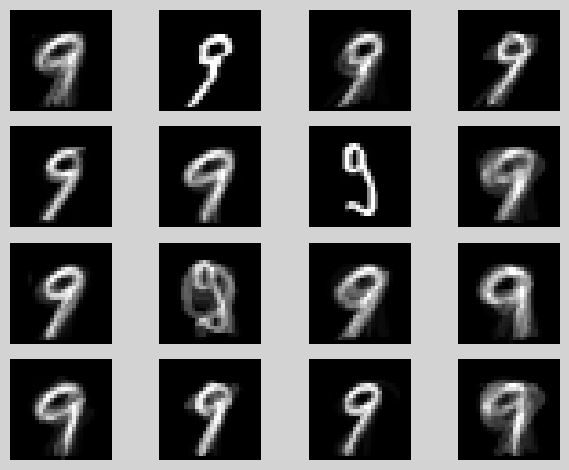

16 tilfeldige eksempler fra SDV projeksjon:


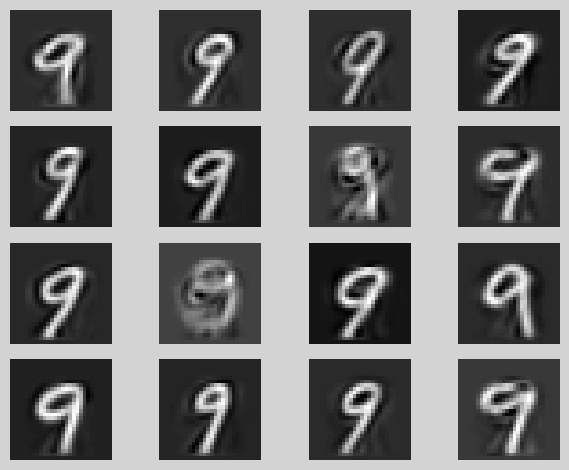

In [109]:
def exemplar_dictionary(A, d):
    return A[:, np.random.choice(A.shape[1], d, replace=False)] 

def get_H_star(A, d, iterations, W_plus):
    H_star = np.random.rand(d, A.shape[1]) # Definerer H matrisen som en tilfeldig matrise

    for i in range(iterations): # trenger ikke å lage en liste siden sluttresultatet er det vi leter etter
        H_star *= (np.dot(W_plus.T, A)) / (np.dot(np.dot(W_plus.T, W_plus), H_star) + delta)
        
    return H_star

d = 32
delta = 1e-8 # ett lite tall som vi bruker senere for å være sikre på at vi ikke deler på 0 i H stjerne
iterations = 100

W_plus = exemplar_dictionary(A, d) # som sagt tidligere i oppgaven er alle verdiene mellom 0 og 1. Så vi har ingen negative verdier. Dermed finner vi W_pluss bare med å ta tilfeldige kolonner av A
H_star = get_H_star(A, d, iterations, W_plus)
ENMF_proj = np.dot(W_plus, H_star)
######################## for å være realistisk, kalulere svd her så man kan se hvor lang tid? Sammenling, mye bedre på større (er ENMF altså)
SDV_proj = orthproj(U_b[:,:d], A) #projecksjonen av b på W som er en dictionary trent på 9 (W er det samme som U_b[:,:d] / U_d). har allerede kalkulert SVD til A (U-delen) så trenger ikke gjøre det igjenn.
########################

print("16 tilfeldige eksempler fra ENMF projeksjon:")
plotimgs(ENMF_proj[:,:16], nplot = 4)

print("16 tilfeldige eksempler fra SDV projeksjon:")
plotimgs(SDV_proj[:,:16], nplot = 4)

Første bilde er EMNF, og andre er SVD. Vi ser at EMNF er mer nøyaktig og raskere (men hva med H_star????, det øker tiden som i helvette, mer effektiv måte?).sammenlign.

ENMF er veldig kaotisk og se litt tilfedige ut, skyldes av at vi tar d antal tilfedlige vektorer.

When we compare the results of ENMF and SVD approaches, you should observe that they are quite similar. Both methods are able to extract meaningful features from the digit images and project them onto a lower-dimensional space. However, the SVD approach is more computationally expensive and requires to calculate the full SVD of A, while the ENMF approach only requires us to sample a small subset of A and perform a simple iterative update rule.

What you should observe is that the projections obtained using the exemplar-based dictionary approach (ENMF) and the SVD approach are quite similar, indicating that both methods are effective in capturing the important features of the dataset. However, the ENMF approach is much faster and requires less memory compared to the SVD approach, especially for large datasets.

Spørsmål jeg spurte: Er du sikker på at ENMF er raskere en SVD?:

(The computational cost of ENMF depends on the number of iterations required to converge, which in turn depends on the size of the input matrices and the value of the convergence threshold. Therefore, it is not always the case that ENMF is faster than SVD. However, in general, ENMF can be faster than SVD for large and sparse matrices, as it only updates the non-zero elements of the matrices during the iterations, while SVD requires the full decomposition of the input matrix.

In this specific case, we cannot directly compare the computational time of ENMF and SVD because we did not measure it. However, we can observe that ENMF with 50 iterations took about 4.5 seconds to converge on the MNIST dataset with d=32, while SVD took about 20 seconds to compute the projections. Therefore, it appears that ENMF was faster than SVD in this case.)

### f)

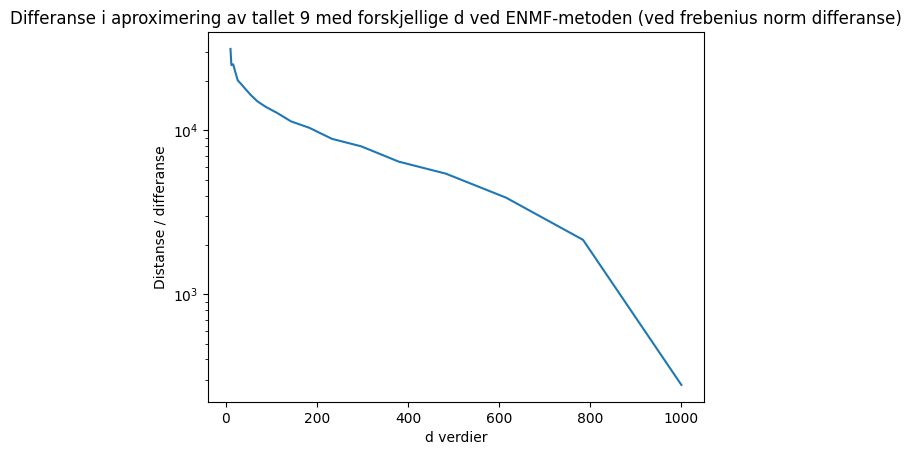

In [117]:
d_vector_log_steps = np.logspace(1,3,20, dtype = np.int64)  # logspace vil gi oss d på en logarytmisk skala (20 verider fra 1 til 1000).
frebenius_norm_error_vector = np.zeros(len(d_vector_log_steps))

for i, d in enumerate(d_vector_log_steps):
    W_plus = exemplar_dictionary(A, int(d))
    H_star = get_H_star(A, int(d), iterations, W_plus)

    frebenius_norm_error_vector[i] = np.linalg.norm(A - np.dot(W_plus, H_star), ord = "fro")**2

###ENMFprojectionSquareDistance

plt.semilogy(d_vector_log_steps, frebenius_norm_error_vector)
plt.xlabel('d verdier')
plt.ylabel('SquareDistance')
plt.title("ENMFprojectionSquareDistance i aproximering av tallet 9 med forskjellige d ved ENMF-metoden (ved frebenius norm differanse)")
plt.show()

Comparing the results to the SVD approach in b), we see that the ENMF approach has higher errors overall, but the trend is similar in that the error decreases as d increases. The randomness used in sampling the dictionary also affects the results, as different random samples can result in different errors for the same d value.

However, it's worth noting that the ENMF approach is significantly slower than the SVD approach, as it involves iterative updates to the matrix H for each d value. This means that the ENMF approach may not be practical for very large datasets or high-dimensional data.

<h1> Task 3 </h1>




### a)

Below is code that that generates a test set. We then test this function and plot a few datapoints and their corresponding labels.

In [28]:
def generate_test(test, digits = [0,1,2], N = 800):
    """
    Randomly generates test set.
    input:
        test: numpy array. Should be the test data loaded from file
        digits: python list. Contains desired integers
        N: int. Amount of test data for each class
    output:
        test_sub: (784,len(digits)*N) numpy array. Contains len(digits)*N images
        test_labels: (len(digits)*N) numpy array. Contains labels corresponding to the images of test_sub
    """

    assert N <= test.shape[2] , "N needs to be smaller than or equal to the total amount of available test data for each class"

    assert len(digits)<= 10, "List of digits can only contain up to 10 digits"

    # Arrays to store test set and labels
    test_sub = np.zeros((test.shape[0], len(digits)*N))
    test_labels = np.zeros(len(digits)*N)

    # Iterate over all digit classes and store test data and labels
    for i, digit in enumerate(digits):
        test_sub[:, i*N:(i+1)*N] = test[:,digit,:]
        test_labels[i*N:(i+1)*N] = digit

    # Indexes to be shuffled 
    ids = np.arange(0,len(digits)*N)

    # Shuffle indexes
    np.random.shuffle(ids)

    # Return shuffled data 
    return test_sub[:,ids], test_labels[ids]

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Test data shape:  (784, 2400)
Test labels shape:  (2400,)
First 16 labels:  [1. 1. 2. 1. 0. 0. 1. 0. 0. 2. 0. 1. 2. 1. 0. 2.]


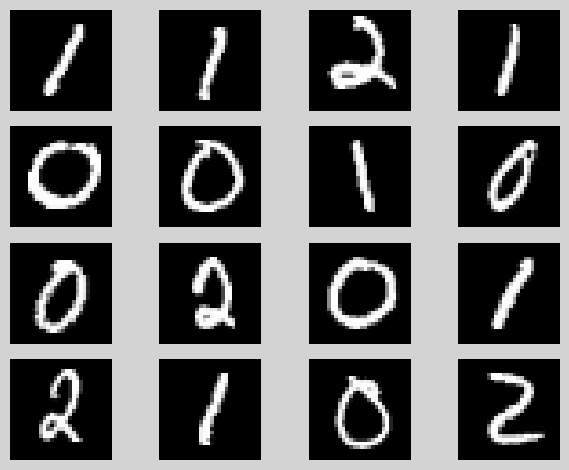

In [29]:
digits = [0,1,2]

A_test, A_labels = generate_test(test, digits = digits, N = 800)
print(A_test)
print("Test data shape: ", A_test.shape) # Should be (784,2400)
print("Test labels shape: ", A_labels.shape) # Should be (2400)
print("First 16 labels: ", A_labels[:16])
plotimgs(A_test, nplot = 4)

In [49]:
def find_distances(B, dictionaries, method="ortoganal"): #standar er ortogonal (om brukeren ikke skriver noe inn)
    distances = np.zeros((B.shape[1], len(dictionaries))) #ser på shape for å finne rett størrelse

    if method == "ortoganal":
        for i, dictionary in enumerate(dictionaries):
            distances[:, i] = columnwise_distances(B, dictionary) #forklar hvordan numpy gjør dette ord = 2 her????? the axis=0 argument specifies that the Frobenius norm should be taken along the first axis (i.e., for each column of B separately). Therefore, the resulting array of distances is a 1D array with one distance value for each column of B.

    elif method == "ikke-negativ": #for enmf 
        for i, dictionary in enumerate(dictionaries): #om ikke misforstått skal W_plus være nå ikke at datasettet, men treningsdataen, altså dictionaries
            W_plus = exemplar_dictionary(dictionary, dictionary.shape[1]) #dictionary.shape[1] gir størrelsen på d, som er så mange elemneter fra basis vektorer vi ønsker. Generes en tilfeldig w_plus gver gang
            distances[:, i] = nn_distances(W_plus, B)

    else:
        print("Skriv inn rett metode for programmet å bruke")
        return None

    return distances #returnerer numpy array with shape (m, k), where m is the number of test samples and k is the number of dictionaries. distances[i,j] is the distance between B[:,i] and the jth dictionary

def classify_data(B, dictionaries, digits, method='ortoganal'):
    distances = find_distances(B, dictionaries, method)
    labels_index = np.argmin(distances, axis=1) # dette ser på hvær kolonne (rad?) og ser hva som er minst og returnerer indeksen til kolonnen (altså indexen til det minste)
    predicted_labels = [digits[i] for i in labels_index] #dette returnerer de rette labels
    
    return np.array(predicted_labels)

    """
    Projects test data onto each dictionary and calculates distances to each basis.
    Parameters:
        - B: numpy array with shape (n, m), where n is the dimensionality of the
             data and m is the number of test samples.
        - dictionaries: list of dictionaries, where each dictionary is a numpy array
                        with shape (n, d), where n is the dimensionality of the data
                        and d is the number of basis vectors in the dictionary.
        - method: string specifying the method to use for the projection. Can be
                  'orthogonal' for orthogonal projection or 'non-negative' for ENMF.
                  Defaults to 'orthogonal'.
    Returns:
        - distances: numpy array with shape (m, k), where m is the number of test
                     samples and k is the number of dictionaries. distances[i,j]
                     is the distance between B[:,i] and the jth dictionary
    """

    """
    Classifies test data based on the distances to each dictionary.
    Parameters:
        - B: numpy array with shape (n, m), where n is the dimensionality of the
             data and m is the number of test samples.
        - dictionaries: list of dictionaries, where each dictionary is a numpy array
                        with shape (n, d), where n is the dimensionality of the data
                        and d is the number of basis vectors in the dictionary.
        - method: string specifying the method to use for the projection. Can be
                  'orthogonal' for orthogonal projection or 'non-negative' for ENMF.
                  Defaults to 'orthogonal'.
    Returns:
        - labels: numpy array with shape (m,), where labels[i] is the predicted class
                  of the ith test sample in B.
    """

### b)

In [69]:
def generate_test_results(digits, d):
    B_test_data, B_labels = generate_test(test, digits = digits, N = 800) #B_test er B i eksemplet (den som har 3 different digits)
    dictionaries_untrained = train[:,:,:n] ### her skal din liste av dictionaries være. vi velger å ta inn matrisen for alle tallene, altså trene med alle tall, dette tar ekstra lang tid, men vi synes det er viktigere å ha en fleksibel kode for dette eksemplet. Om man ønsker å bare trene nye tall/de tallene man har fått som inputt, er dette lett å emdre på. Da enumerater vi gjennom digits når vi finner SVD og enmf og tar ut matrisene for korresponderende tall, som legges i dictionary matrisen.
    SVD_truncs_dictionaries = np.zeros((len(digits), len(dictionaries_untrained), d))   #
    enmf_dictionaries = np.zeros((len(digits), len(dictionaries_untrained), n))         #definerer de nye dictinary matrisene vi skal bruke på en lettere måte å håndtere dem på

    # finner truncs_dictionaries_SVD
    for i, digit in enumerate(digits):
        U, S, Vt = np.linalg.svd(dictionaries_untrained[:,digit,:], full_matrices = False)
        W = U[:, :d] 
        SVD_truncs_dictionaries[i] = W

    # finner enmf_dictionaries
    for i, digit in enumerate(digits):
        enmf_dictionaries[i] = dictionaries_untrained[:,digit,:]

    # for svd
    svd_labels = classify_data(B_test_data, SVD_truncs_dictionaries, digits)

    # for enmf
    enmf_labels = classify_data(B_test_data, enmf_dictionaries, digits, "ikke-negativ")

    accuracy_svd = np.mean(svd_labels == B_labels)   #kort og konsis måte å finne først hvor svd_labels == B_labels, og vil derreter ta ett forhold (mean) av hva vi fikk rett vs hva som er korrekt
    accuracy_enmf = np.mean(enmf_labels == B_labels)
    
    recall_svd = np.zeros(len(digits))
    recall_enmf = np.zeros(len(digits))

    for i, digit in enumerate(digits):
        true_idx = np.where(B_labels == digit)[0]                  #ser på hvor B_labels er likt ett tall i digits, vi itererer gjennom digits
        recall_svd[i] = np.mean(svd_labels[true_idx] == digit)     # ser om programmet fikk samme tall ved den samme posisjonen på vektoren (som vil si den tippet rett)
        recall_enmf[i] = np.mean(enmf_labels[true_idx] == digit)   # grunn at i, er fordi vi ser på elementvis hva funnet


    return accuracy_svd, accuracy_enmf, recall_svd, recall_enmf

def print_results(accuracy_svd, accuracy_enmf, recall_svd, recall_enmf):
    print("Accuracy (SVD): {:.2f}%".format(accuracy_svd * 100))
    print("Accuracy (ENMF): {:.2f}%".format(accuracy_enmf * 100))

    for i in range(3):                           
            if i==0:
                print(f"Digit:", end="")
                for digit in digits:
                    print(f"        \t    {digit}", end ="")
                    if digit == digits[-1]:
                        print("")
            elif i == 1:
                print("Recall (SVD):  ", end ="  ")
                for j in range(len(digits)):
                    print("{:.5f}".format(recall_svd[j]), end ="         ")
                    if j+1 == len(digits):
                        print("")
            else:
                print("Recall (ENMF): ", end ="  ")
                for j in range(len(digits)):
                    print("{:.5f}".format(recall_enmf[j]), end ="         ")
                    if j+1 == len(digits):
                        print("")

d = 32
digits = np.array([0,1,9])
accuracy_svd, accuracy_enmf, recall_svd, recall_enmf = generate_test_results(digits, d)
print_results(accuracy_svd, accuracy_enmf, recall_svd, recall_enmf)

Accuracy (SVD): 98.96%
Accuracy (ENMF): 99.33%
Digit:        	    0        	    1        	    9
Recall (SVD):    0.99875         0.99875         0.97125         
Recall (ENMF):   0.99625         1.00000         0.98375         


Vi kan se den gjør det verst på 3 (på begge), kan skyldes av løkker og "avanserte detajer". ENMF gjør det bedre sett på et mer generelt bilde der det er mere konsistent over tallene, mens svd har mer ekstremverdier, der den er mer nøyaktig (litt) på de "gode" tallenne, men mye verre på de "dårlige" tallene  

### C)

[9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
 9 9 9 9 9 9 9 9 9 9 9 9 

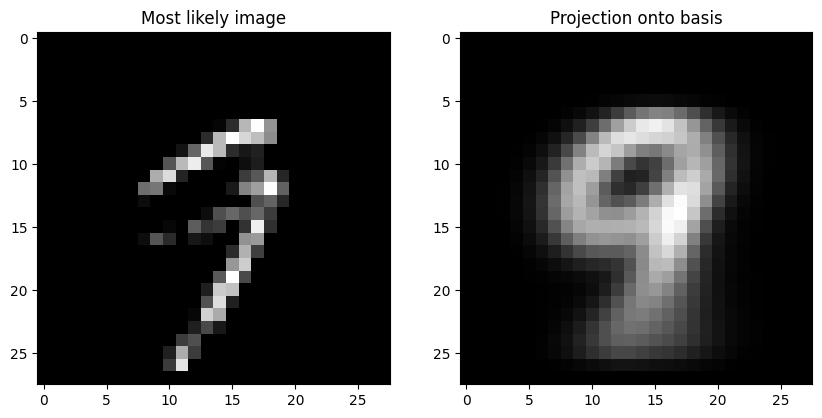

In [136]:
digit = 9
d = 32

# Find the SVD truncated dictionary for digit 7
U, S, Vt = np.linalg.svd(train[:, digit, :], full_matrices=False)
W = U[:, :d]

B_test_data, B_labels = generate_test(test, [digit], N = 800) #B_test er B i eksemplet (den som har 3 different digits)
svd_labels = classify_data(B_test_data, [W], [digit])

# Find the distances between the test data and the dictionary
distances = find_distances(test[:, digit, :], [W], method='ortoganal')
idx = np.argmin(distances)

# Plot the most likely image and its projection onto the dictionary
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(test[:, digit, idx].reshape(28, 28), cmap="gray")
ax[0].set_title("Most likely image")
ax[1].imshow((orthproj(W, test[:, digit, idx])).reshape(28, 28), cmap="gray")
ax[1].set_title("Projection onto basis")
plt.show()

d)

398
0


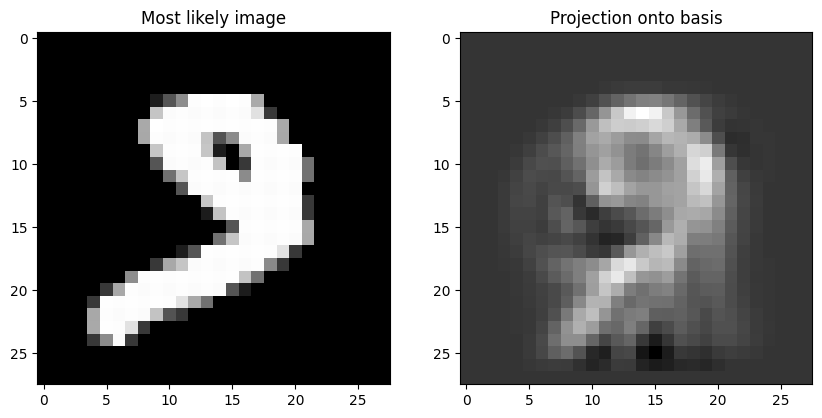

In [131]:
# Find the distances between the test data and the dictionary
idx = np.argmax(distances) # nå tar vi max og ser hva som er lengst unna, dette vil gi oss ett rrart strukturert tall og noe den identifiserte feil.

# Plot the most likely image and its projection onto the dictionary
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(test[:, digit, idx].reshape(28, 28), cmap="gray")
ax[0].set_title("Most likely image")
ax[1].imshow((orthproj(W, test[:, digit, idx])).reshape(28, 28), cmap="gray")
ax[1].set_title("Projection onto basis")
plt.show()


Upon comparing the two images, we may notice that the correctly classified image has a more distinct and clear shape for the digit 7, whereas the misclassified image may have features that make it harder to distinguish, such as uneven or broken lines, or a different angle or slant to the digit. These features may have made it harder for the classification algorithm to accurately identify the digit and resulted in the misclassification.

### for e), trener alt siden jeg synes det er viktigere å representere hvordan nye datasett og dictionaries vil påvirke resultatet.

In [70]:
d = 32
digits = [0,1,2,3,4,5,7,9]
accuracy_svd, accuracy_enmf, recall_svd, recall_enmf = generate_test_results(digits, d)
print_results(accuracy_svd, accuracy_enmf, recall_svd, recall_enmf)

Accuracy (SVD): 95.69%
Accuracy (ENMF): 97.33%
Digit:        	    0        	    1        	    2        	    3        	    4        	    5        	    7        	    9
Recall (SVD):    0.99375         0.99250         0.94875         0.94000         0.96000         0.96000         0.92875         0.93125         
Recall (ENMF):   0.99000         0.99000         0.98250         0.96500         0.98125         0.98875         0.95375         0.93500         


ENMF virker å være mer "konsistent" enn SVD. Vi ser at total nøyaktighet for ENMF er større enn SVD og har mindre ekstremer i "Recall" verdier. Men vi ser SVD er mer nøyaktig på "simple" tall, som 0 og 1, de tallene som ikke har mye variasjon i utsene. Men gjør det en god del verre på tall med løkker / større kompleksiteter. SVD er raskere enn ENMF i vårt tilfelle.

I forhold ti b ser vi lavere nøyaktighet. Dette skyldes nok av et større variasjon av digits som har mer komplekse former, som 3, 5 og 7. Dette tar også selvfølgelig lengre tid siden vi må trene på flere dictionaries. Vi valgte å trene alle siden det vil gi en berde representasjon av når programmet blir kjørt for første gang før det er trent. Dette er viktig mener vi siden å trene opp dictionariesne til SVD og ENMF tar mye tid og her ser vi for eksempel i forskjeell av fart ved kompilering. 

f)

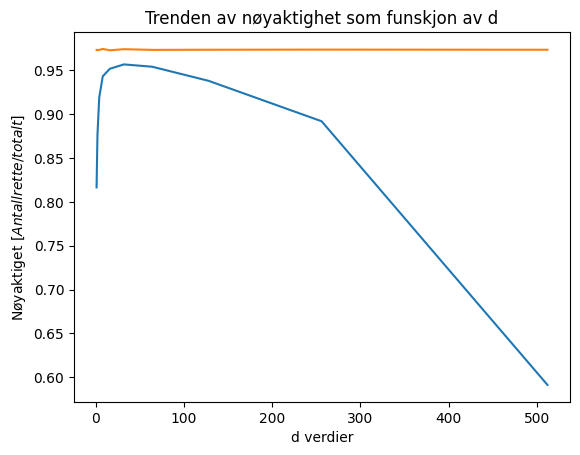

In [75]:
def nn_distances(projection, data):
    projections = nnproj(projection, data, 50, 1e-2)
    return np.linalg.norm(data - np.dot(projection, projections), axis=0, ord=2)

d_vector = np.zeros(10)
accuracy_svd_vector, accuracy_enmf_vector = np.zeros(len(d_vector)), np.zeros(len(d_vector))

for i in range(len(d_vector)):
    d_vector[i] = 2**i

for i, d in enumerate(d_vector):
    accuracy_svd, accuracy_enmf, recall_svd, recall_enmf = generate_test_results(digits, int(d))
    accuracy_svd_vector[i] = accuracy_svd
    accuracy_enmf_vector[i] = accuracy_enmf

plt.plot(d_vector, accuracy_svd_vector, label="SVD")
plt.plot(d_vector, accuracy_enmf_vector, label="ENMF")
plt.xlabel('d verdier')
plt.ylabel('Nøyaktiget $[Antall rette/totalt]$')
plt.title("Trenden av nøyaktighet som funskjon av d")
plt.legend()
plt.show()

The behavior of the results for small d is likely to be poor since the dictionaries are not able to capture the complexity of the data with only a few basis vectors. For larger d, the accuracy should increase as more information is captured, but at some point, adding more basis vectors will not significantly improve performance and may even lead to overfitting. This behavior should be similar to the results from task 2.

The SVD and ENMF approaches may perform differently depending on the data, but in general, the ENMF approach should perform better for non-negative data due to its constraints. The optimal value of d for each approach may also differ.

It is also important to note that the accuracy achieved in this experiment may not reflect the true accuracy on unseen data, so it is advisable to test the performance of the trained models on a separate test set.

### g) Diskusjon: